## Imports

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from time import sleep
from constants import *
import os

## Helpers

In [5]:
def get_clock_jumps(df):
    clock_jumps = []
    prev = 0
    for _, row in df.iterrows():
        clock_jumps.append(row['Logical Time'] - prev)
        prev = row['Logical Time']
    return clock_jumps

## Experiments

Running model with constants: [2, 4, 5]
('127.0.0.1', 8000) 0.5
Starting server at ('127.0.0.1', 8000)
('127.0.0.1', 8001) 0.25
Starting server at ('127.0.0.1', 8001)
('127.0.0.1', 8002) 0.2
Starting server at ('127.0.0.1', 8002)
Client-side connection success from ('127.0.0.1', 8000) to ('127.0.0.1', 8001)
Client-side connection success from ('127.0.0.1', 8000) to ('127.0.0.1', 8002)
Client-side connection success from ('127.0.0.1', 8001) to ('127.0.0.1', 8000)
Client-side connection success from ('127.0.0.1', 8002) to ('127.0.0.1', 8000)
Client-side connection success from ('127.0.0.1', 8001) to ('127.0.0.1', 8002)
Client-side connection success from ('127.0.0.1', 8002) to ('127.0.0.1', 8001)
Running model with constants: [1, 2, 3]
('127.0.0.1', 8000) 1.0
Starting server at ('127.0.0.1', 8000)
('127.0.0.1', 8001) 0.5
Starting server at ('127.0.0.1', 8001)
('127.0.0.1', 8002) 0.3333333333333333
Starting server at ('127.0.0.1', 8002)
Client-side connection success from ('127.0.0.1', 80

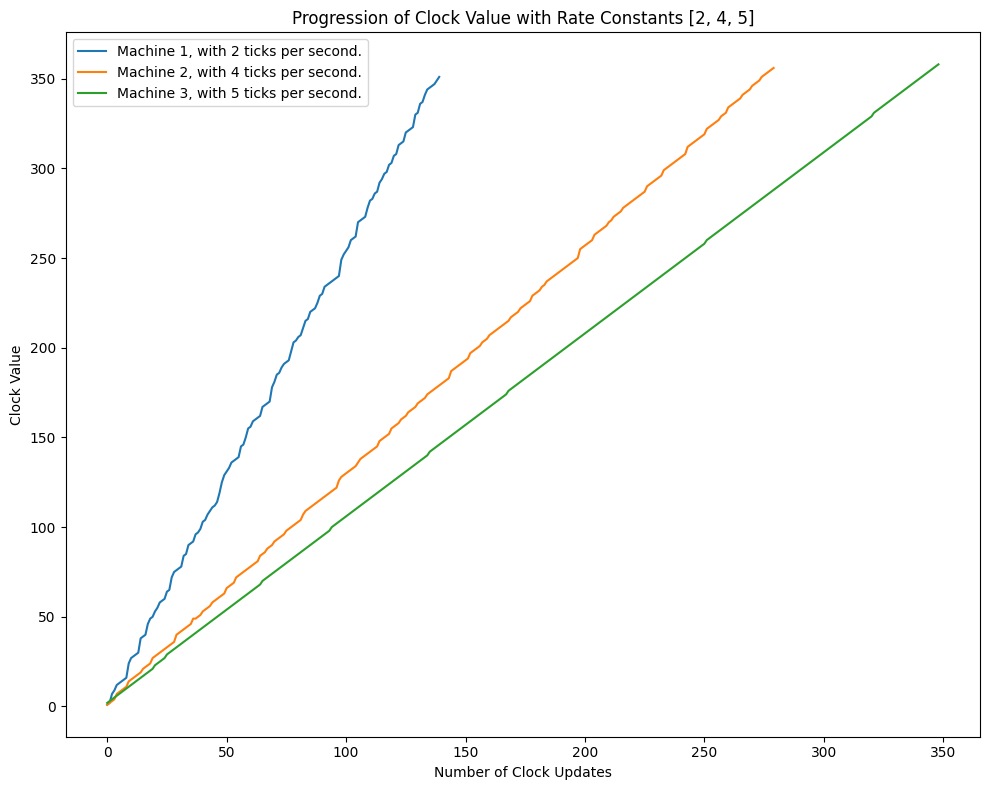

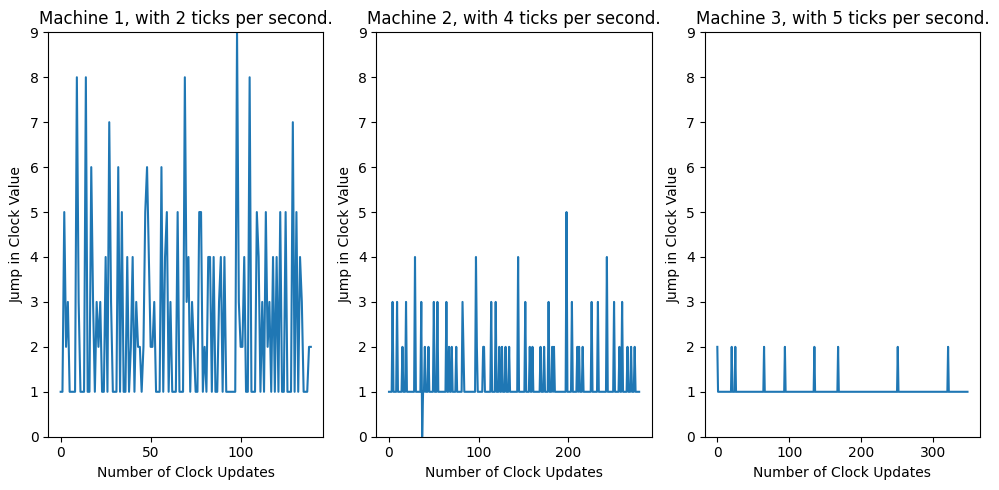

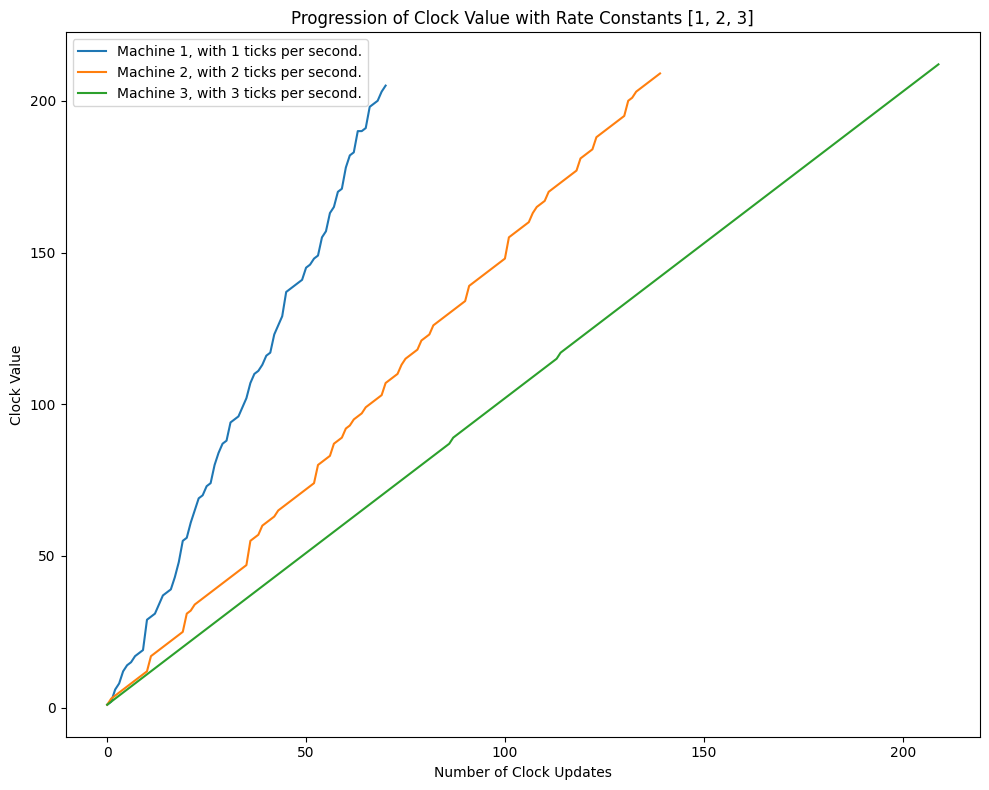

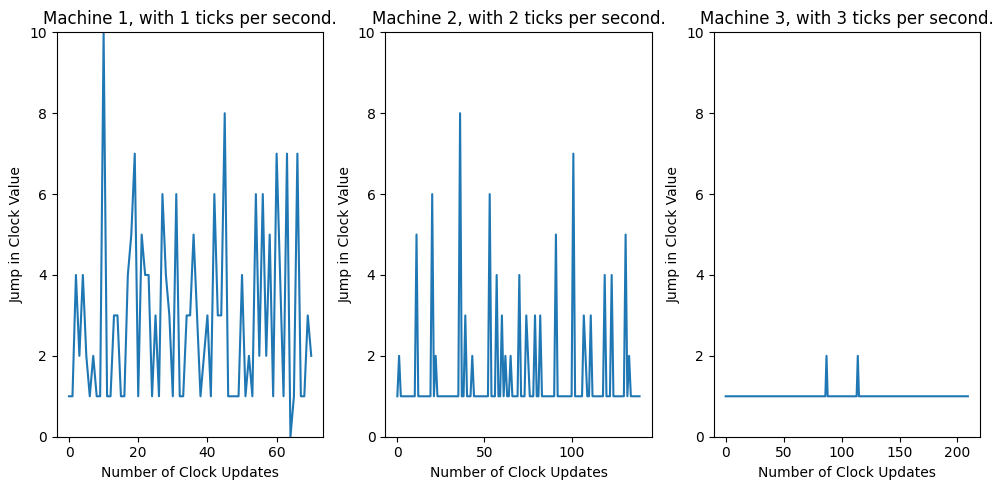

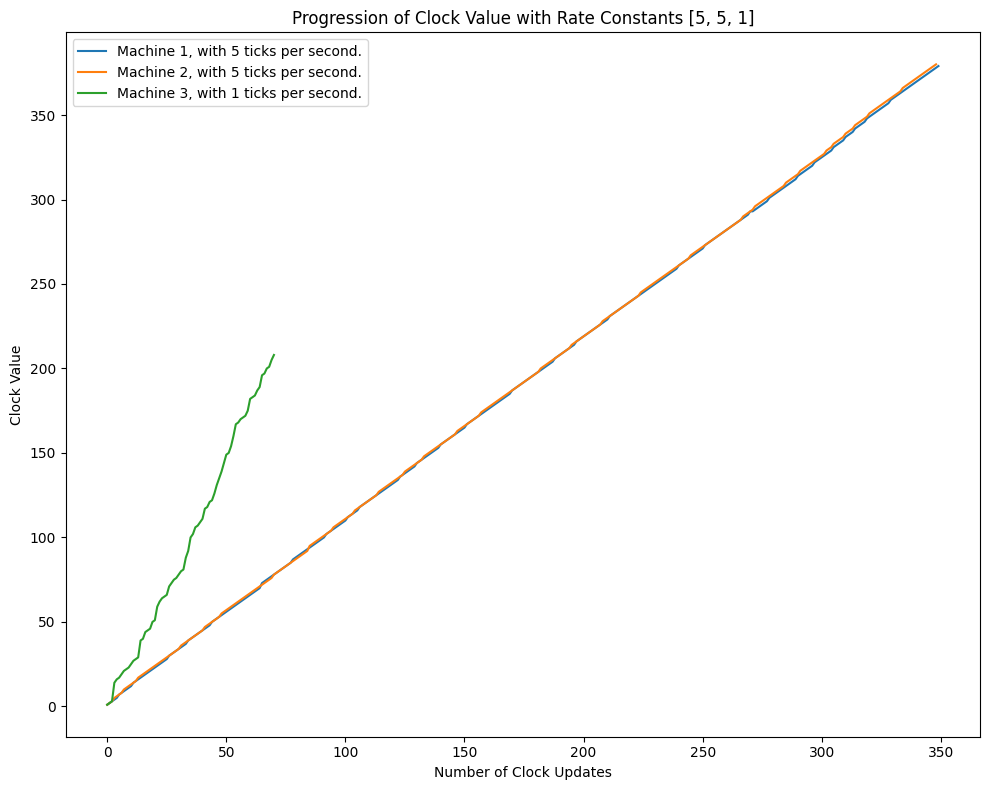

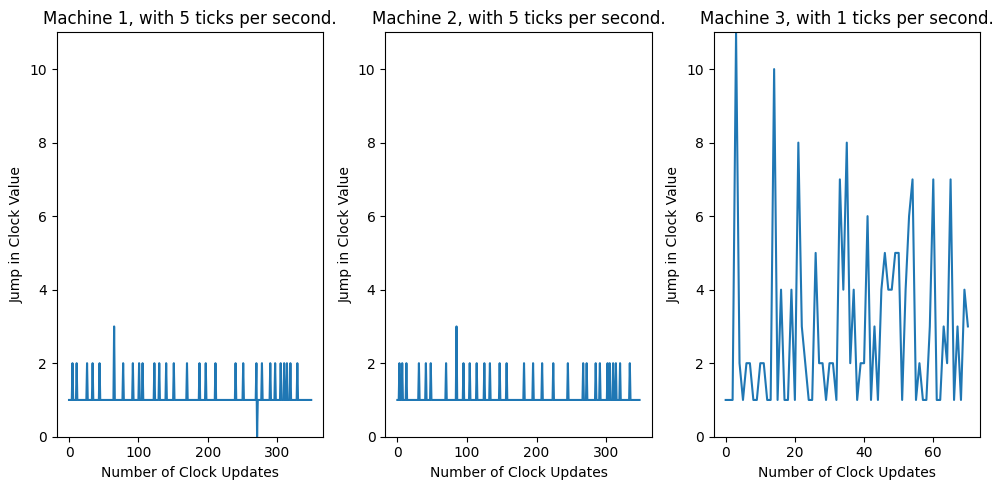

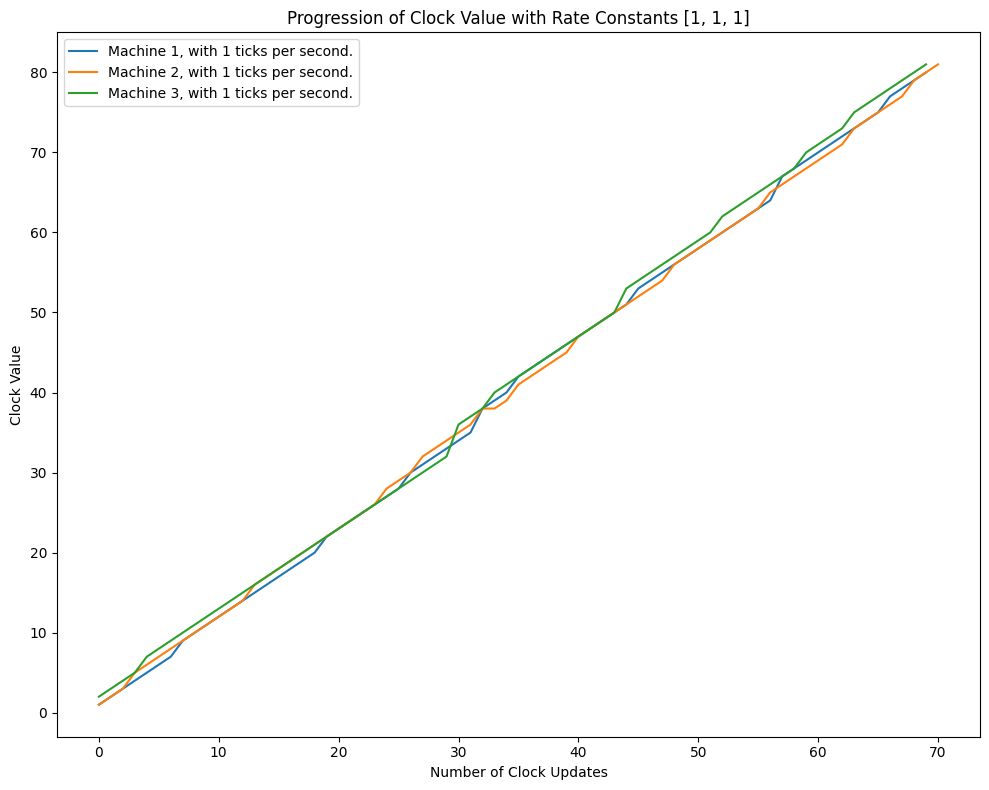

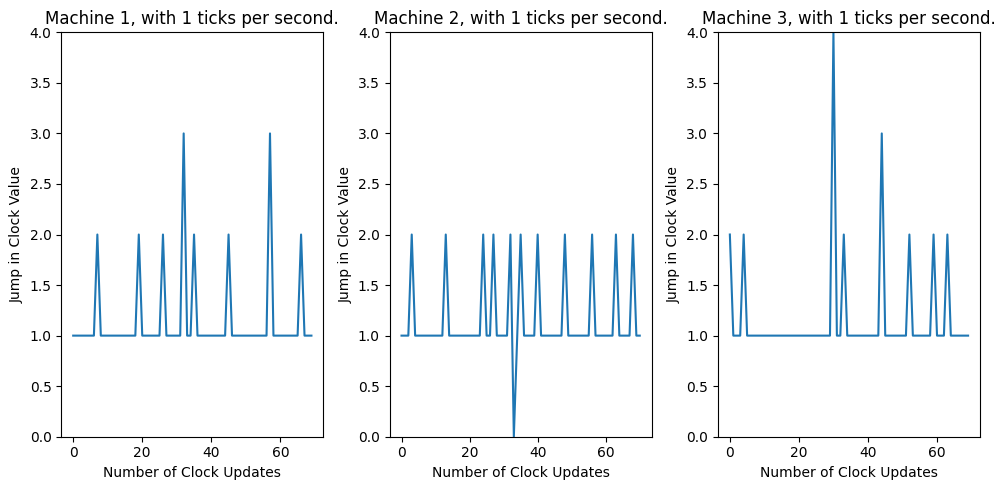

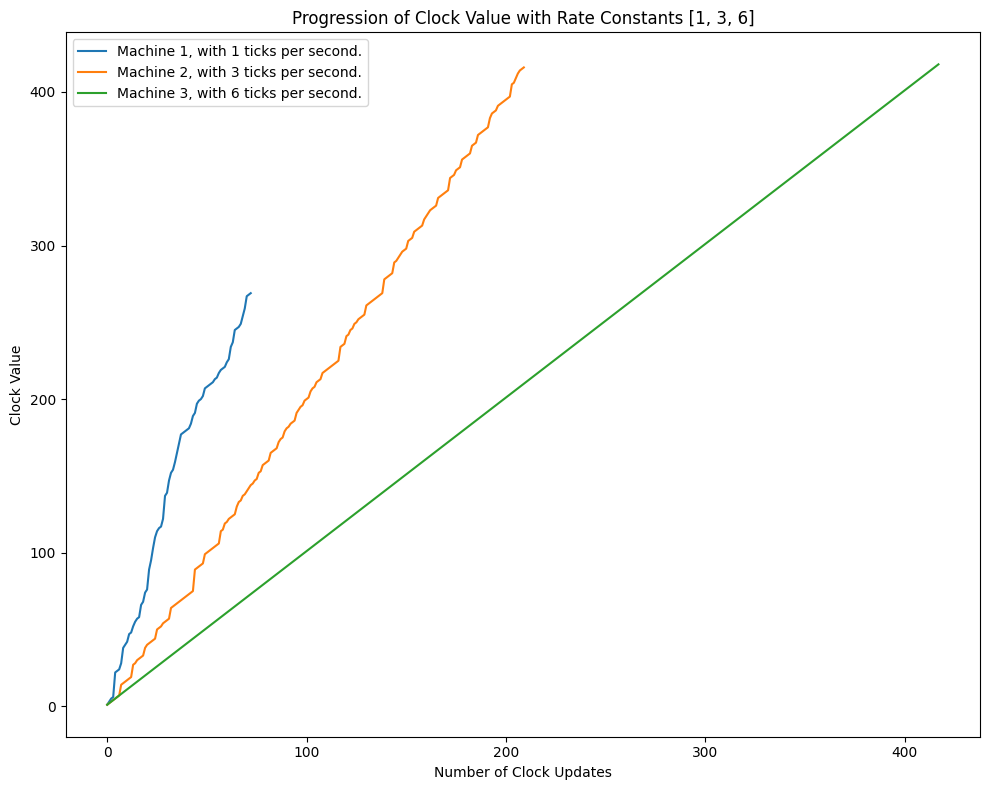

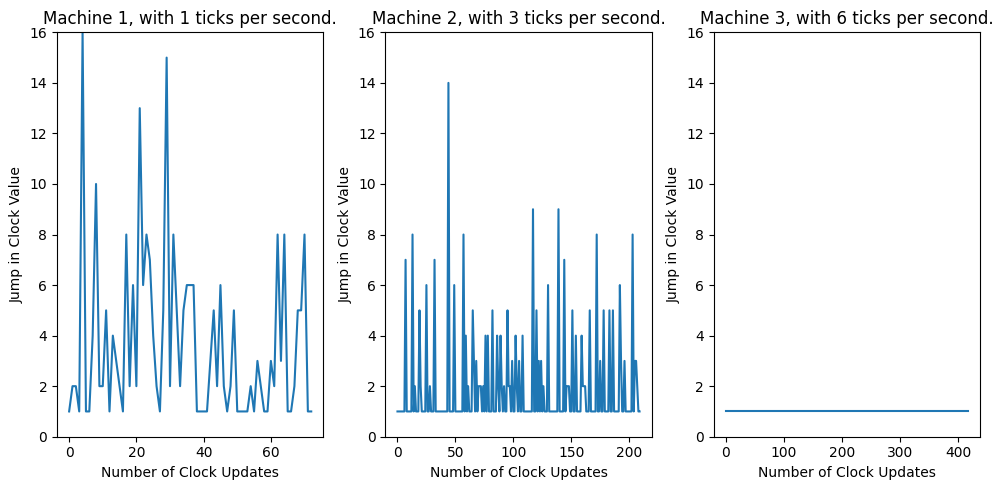

In [6]:
csvs = [LOG_FILE_1, LOG_FILE_2, LOG_FILE_3] # Log file format is "Operation,Global Time,Logical Time,Length of Message Queue"
constants = [[2, 4, 5], [1, 2, 3], [5, 5, 1], [1, 1, 1], [1, 3, 6]]


for i, constant in enumerate(constants):
    if "clock_progression_" + str(i) + ".png" in os.listdir() and "clock_progression_" + str(i) + "_hist.png" in os.listdir():
        continue
    clock_jumps_lst = []
    fig, axs  = plt.subplots(1, 1, figsize = (10,8))
    # Run the model with the given constants
    print(f"Running model with constants: {constant}")
    ! python3 model.py 70 {constant[0]} {constant[1]} {constant[2]}
    for j in range(len(csvs)):
        df = pd.read_csv(csvs[j])
        clock_jumps_lst.append(get_clock_jumps(df))
        axs.plot(df["Logical Time"], label = f"Machine {j + 1}, with {constant[j]} ticks per second.")
    axs.set_title("Progression of Clock Value with Rate Constants " + str(constant))
    axs.set_xlabel("Number of Clock Updates")
    axs.set_ylabel("Clock Value")
    axs.legend()
    fig.tight_layout()
    fig.savefig("clock_progression_" + str(i) + ".png")
    
    fig1, axs1 = plt.subplots(1, 3, figsize = (10,5))
    y_max = max([max(lst) for lst in clock_jumps_lst])
    for j, lst in enumerate(clock_jumps_lst):
        axs1[j].plot(lst)
        axs1[j].set_title(f"Machine {j + 1}, with {constant[j]} ticks per second.")
        axs1[j].set_xlabel("Number of Clock Updates")
        axs1[j].set_ylabel("Jump in Clock Value")
        axs1[j].set_ylim([0, y_max])
    fig1.tight_layout()
    fig1.savefig("clock_progression_" + str(i) + "_hist.png")
    
    # Reset the socket connections
    sleep(60)


In [7]:
dfs = map(pd.read_csv, [LOG_FILE_1, LOG_FILE_2, LOG_FILE_3])

for i, df in enumerate(dfs):
    print(f"Machine {i + 1} Average Logical Clock Jump: ", '%.3f' % (df['Logical Time'] - df['Logical Time'].shift(periods=1, fill_value=0)).mean())

Machine 1 Average Logical Clock Jump:  3.685
Machine 2 Average Logical Clock Jump:  1.981
Machine 3 Average Logical Clock Jump:  1.000
